In [7]:
#importing libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

#loading data
dataset = load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()

#data cleaning
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

FILTER FOR INDIAN DATA ANALYST ROLES

Text(0, 0.5, '')

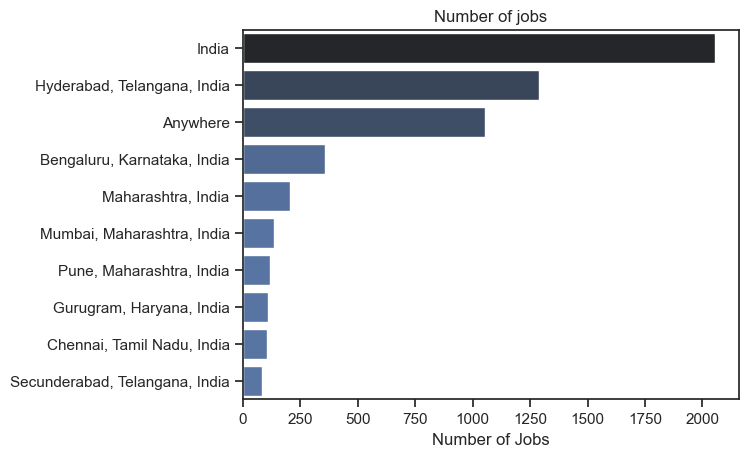

In [8]:
df_ind=df[(df['job_country']== "India") & (df['job_title_short']== "Data Analyst") ]
df_plot=df_ind['job_location'].value_counts().head(10).to_frame()  #to make it a dataframe

sns.barplot(data=df_plot,x="count",y="job_location",hue="count",palette="dark:b_r",legend= False)
sns.set_theme(style='ticks')
plt.title('Number of jobs')
plt.xlabel("Number of Jobs")
plt.ylabel('')


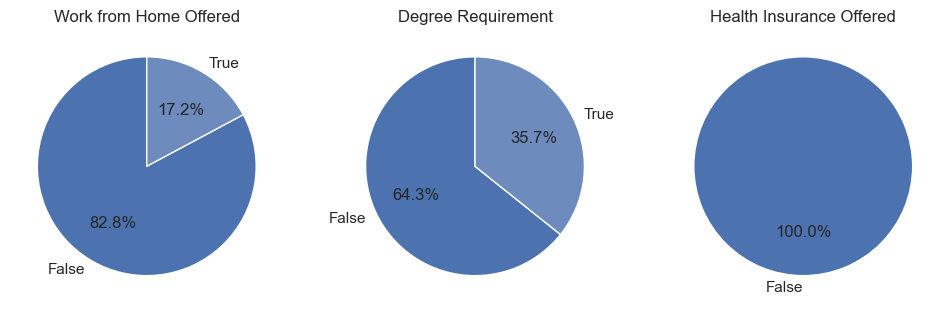

In [3]:
fig,ax=plt.subplots(1,3)
fig.set_size_inches((12, 5))
sns.set_style("whitegrid")

dict_coloumn = {
    "job_work_from_home": 'Work from Home Offered',
    "job_no_degree_mention": "Degree Requirement",
    "job_health_insurance": "Health Insurance Offered"
}

for i,(coloumn,title) in enumerate (dict_coloumn.items()):
    df_ind[coloumn].value_counts().plot(kind="pie",ax=ax[i],autopct='%1.1f%%', startangle=90, colors=sns.color_palette("light:b_r"))
    ax[i].set_title(title)
    ax[i].set_ylabel("")



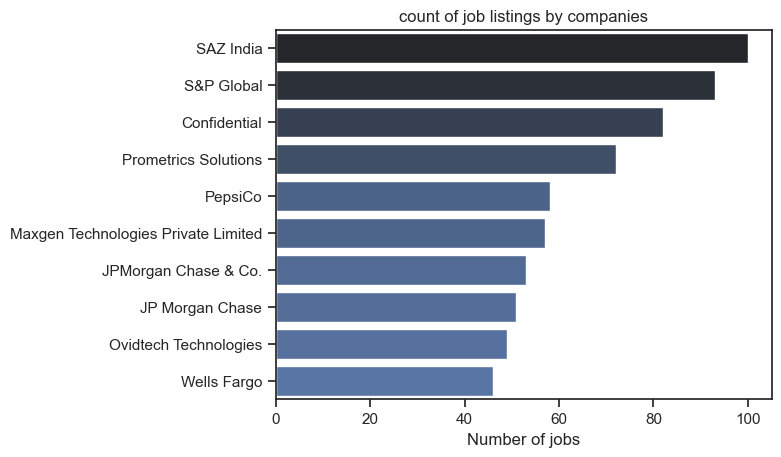

In [6]:
df_plot=df_ind['company_name'].value_counts().head(10).to_frame()
sns.set_theme(style='ticks')
sns.barplot(data=df_plot,x="count",y="company_name",hue="count",palette="dark:b_r",legend= False)
plt.title("count of job listings by companies")
plt.xlabel("Number of jobs")
plt.ylabel('')
plt.show()
plt.tight_layout
plt.show()